# Linear Regression
This project demonstrates Linear Regression on the Boston Housing dataset using Python and scikit-learn.

- Dataset: Boston Housing
- Model: Linear Regression
- Metrics: R², MAE, MSE, RMSE
- Tools: Python, scikit-learn, matplotlib


In [31]:
# pip install matplotlib seaborn
# pip install numpay
# pip install pandas
# pip install sklearn

In [32]:
# Data Handeling
import pandas as pd
import numpy as np

In [33]:
# Machine Learing Utilities

# Loading the data set of fetch_califonia_housing directly from Scikit Learn
from sklearn.datasets import fetch_california_housing

# Import the LinearRegression class from scikit-learn to create and train a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics to evaluate the regression model: MSE, MAE, and R² score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# for spliting the data to train and test
from sklearn.model_selection import train_test_split

In [34]:
# Visualization

# Importing the libs for ploting
import matplotlib.pyplot as plt
# Seaborn for more easy and appealing graphics
import seaborn as sns

# Setting the backgroung style, we can do dark, white, darkgrid, ticks
sns.set_style("whitegrid")

In [35]:
# Fetch the California housing dataset
california = fetch_california_housing()

In [ ]:

print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [37]:
# Create a DataFrame from the dataset with feature names as column headers

df = california.data
X = pd.DataFrame(df, columns=california.feature_names)


In [38]:
print(california.target_names)   # shows ['MedHouseVal']
print(california.target[:10])   

['MedHouseVal']
[4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611]


Here we are importing the dataset from statlib, so we are understanding the data set by usin the description fuction. The results indicates that we have 8 attributes and targets, these are the independent factors,features (x), the target is the dependent (y). so were are diplaying traget, and the 8 features

In [39]:
# Exploring Dataset
X.tail(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [40]:
# Ckecking for the null values in each row of the coloumns and getting the sum of it
print(X.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [41]:
print(X.shape)

(20640, 8)


Splitting the data to test and train

In [42]:
# Defining Y the Traget variable bring MedHouseVal
y = pd.Series(california.target, name='MedHouseVal')

In [43]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [44]:
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (16512, 8) (16512,)
Testing set: (4128, 8) (4128,)


In [45]:
# Initialize the Linear Regression model

model = LinearRegression()

In [46]:
# fitting the model on to the training data

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
# testing/predicting the target values on the test data

y_pred = model.predict(X_test)

In [48]:
# R² Score
r2 = r2_score(y_test, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


R² Score: 0.5757877060324512
Mean Absolute Error: 0.5332001304956561
Mean Squared Error: 0.5558915986952438
Root Mean Squared Error: 0.745581383012776


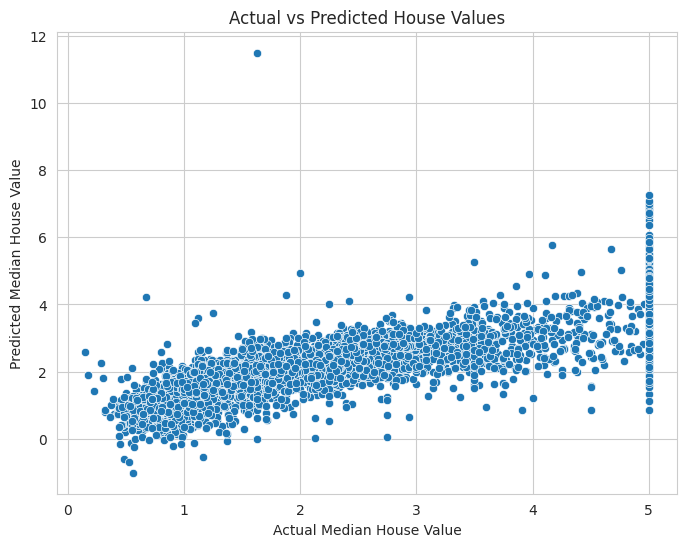

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Values")
plt.show()


In this project, we applied a Linear Regression model to the California Housing dataset to predict the median house value (MedHouseVal) based on 8 features, including median income, house age, and average rooms per household.

| Metric                             | Value | Interpretation                                                                                                        |
| ---------------------------------- | ----- | --------------------------------------------------------------------------------------------------------------------- |
| **R² Score**                       | 0.576 | The model explains approximately 57.6% of the variance in housing prices. This indicates a moderate predictive power. |
| **Mean Absolute Error (MAE)**      | 0.533 | On average, the predicted house values differ from the actual values by 0.533 (in units of 100k USD).                 |
| **Mean Squared Error (MSE)**       | 0.556 | The average squared difference between predictions and actual values.                                                 |
| **Root Mean Squared Error (RMSE)** | 0.746 | Typical prediction error magnitude is 0.746 (in 100k USD).                                                            |


The R² score below 0.6 suggests that Linear Regression captures some trends in the data but does not fully explain housing prices.

Linear Regression assumes a linear relationship between features and target, but some relationships in housing data are likely non-linear.

Some features may need scaling, transformation, or feature engineering to improve performance.

Outliers and extreme values in housing prices may also impact model accuracy

## Conclusion

The Linear Regression model provides a baseline for predicting California house prices. While it captures general trends, more sophisticated models such as Random Forests, Gradient Boosting, or Polynomial Regression may yield better predictive performance. Additionally, feature engineering and outlier handling could further improve results. This project demonstrates the complete workflow of data handling, model training, evaluation, and visualization in Python.